In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('IPdata.csv')

In [3]:
data.head()

,MEMBER_MONTHS,MONTH_OF_DATE,PAYER_ID,PLAN_ID,CONTRACT_NAME,ORG_HIERARCHY_MASTER_ID,SEGMENT_MASTER_ID,RISK_VALUE,RISK_PATIENT_COUNT,TOTAL_VISIT_AMOUNT,...,SNF_VISIT_AMOUNT,IP_VISIT_COUNT,IMAGING_VISIT_COUNT,ED_VISIT_COUNT,SNF_VISIT_COUNT,READMISSION_VISIT_COUNT,INDEX_READMISSION_VISIT_COUNT,FREQ_ED_FLYER_COUNT,AVOIDABLE_ED_VISIT_COUNT,AVOIDABLE_ED_VISIT_AMOUNT
0,1,2020-09-01,1,1,Medicare,1487679643::::1,3493c36c0992035704bd9e085adfa914,5.758,1,1197.02,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,226.25
1,2,2020-09-01,1,1,Medicare,1316925589::::1,49849ca9f014a79e79f7c46e3ee9766f,1.156,2,76.86,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,1,2023-03-01,6,UHC05,Medicare Advantage,1558674812:PR003288:AF1:S001:2,665272720b45e797de68f67eaa449698,NaN,0,332.12,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,1,2020-02-01,1,1,Medicare,1265417380:PR002463:AF2:S001:1,cb8beeb616ea2cb81030a5302f03fd8b,0.741,1,197.91,...,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,1,2022-03-01,10,2,Medicare Advantage,1356458061::::1,4b9c61514ebc758ae4cc34a48fa5ca7c,1.851,1,439.16,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [4]:
data['MONTH_OF_DATE'] = pd.to_datetime(data['MONTH_OF_DATE'])
data['Year'] = data['MONTH_OF_DATE'].dt.year
data['Month'] = data['MONTH_OF_DATE'].dt.month

# calculate IMAGING_VISIT_COUNT wrt (year,month)

In [5]:
#sum the value of 'IP_VISIT_COUNT' for each M&Y : for Temporal Analysis
columns_to_sum = ['IMAGING_VISIT_COUNT']
filtered_data = data[(data['Year'] >= 2020) & (data['Year'] <= 2021)]
data_monthly = filtered_data.groupby(['Year'# set of unique month-year which conains data
available_month_years = set((year, month) for year, month in data_monthly.index)

# rep. 1day of month for each year and check if m&y is available in a_m_y
filtered_months = [datetime.datetime(year, month, 1) for year in [2020, 2021] for month in range(1, 13) if (year, month) in available_month_years]

plt.figure(figsize=(12, 4))
x_values = filtered_months
x_ticks_labels = [calendar.month_abbr[month.month] for month in x_values]

#this loop iterates f_m and fetch v_c for y&m indices if inices found append else error 0
IMAGING_VISIT_COUNT_list = []
for month in filtered_months:
    year, month_num = month.year, month.month
    try:
        IMAGING_VISIT_COUNT = data_monthly.loc[(year, month_num)]
        IMAGING_VISIT_COUNT_list.append(IMAGING_VISIT_COUNT)
    except KeyError:
        ip_visit_counts_list.append(0)

plt.plot(x_values, IMAGING_VISIT_COUNT_list, marker='o', linestyle='-', color='b')

plt.xticks(x_values, x_ticks_labels)
plt.xlabel('Month')
plt.ylabel('Total IP Visit Count')
plt.title('Monthly Line Graph of Total IP Visit Count (2020-2021)')
plt.grid(True)
plt.show()
, 'Month'])[columns_to_sum].sum()

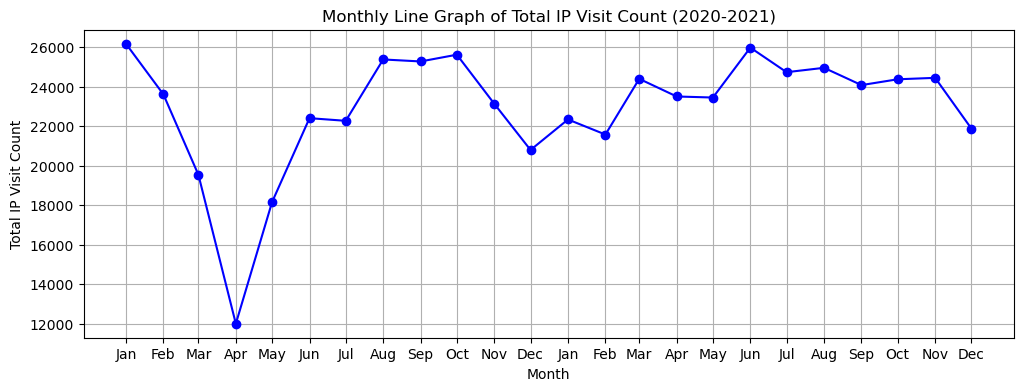

In [6]:
# set of unique month-year which conains data
available_month_years = set((year, month) for year, month in data_monthly.index)

# rep. 1day of month for each year and check if m&y is available in a_m_y
filtered_months = [datetime.datetime(year, month, 1) for year in [2020, 2021] for month in range(1, 13) if (year, month) in available_month_years]

plt.figure(figsize=(12, 4))
x_values = filtered_months
x_ticks_labels = [calendar.month_abbr[month.month] for month in x_values]

#this loop iterates f_m and fetch v_c for y&m indices if inices found append else error 0
IMAGING_VISIT_COUNT_list = []
for month in filtered_months:
    year, month_num = month.year, month.month
    try:
        IMAGING_VISIT_COUNT = data_monthly.loc[(year, month_num)]
        IMAGING_VISIT_COUNT_list.append(IMAGING_VISIT_COUNT)
    except KeyError:
        ip_visit_counts_list.append(0)

plt.plot(x_values, IMAGING_VISIT_COUNT_list, marker='o', linestyle='-', color='b')

plt.xticks(x_values, x_ticks_labels)
plt.xlabel('Month')
plt.ylabel('Total IP Visit Count')
plt.title('Monthly Line Graph of Total IP Visit Count (2020-2021)')
plt.grid(True)
plt.show()


In [7]:
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2022)]

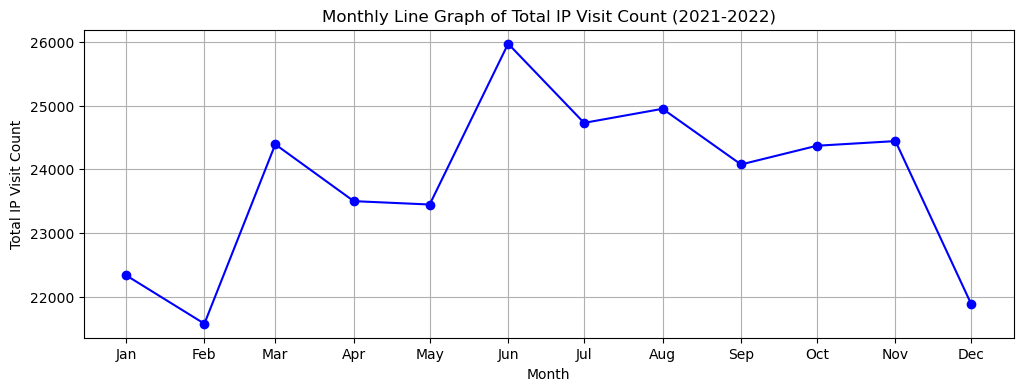

In [8]:
# set of unique month-year which conains data
available_month_years = set((year, month) for year, month in data_monthly.index)

# rep. 1day of month for each year and check if m&y is available in a_m_y
filtered_months = [datetime.datetime(year, month, 1) for year in [2021, 2022] for month in range(1, 13) if (year, month) in available_month_years]

plt.figure(figsize=(12, 4))
x_values = filtered_months
x_ticks_labels = [calendar.month_abbr[month.month] for month in x_values]

#this loop iterates f_m and fetch v_c for y&m indices if inices found append else error 0
IMAGING_VISIT_COUNT_list = []
for month in filtered_months:
    year, month_num = month.year, month.month
    try:
        IMAGING_VISIT_COUNT = data_monthly.loc[(year, month_num)]
        IMAGING_VISIT_COUNT_list.append(IMAGING_VISIT_COUNT)
    except KeyError:
        ip_visit_counts_list.append(0)

plt.plot(x_values, IMAGING_VISIT_COUNT_list, marker='o', linestyle='-', color='b')

plt.xticks(x_values, x_ticks_labels)
plt.xlabel('Month')
plt.ylabel('Total IP Visit Count')
plt.title('Monthly Line Graph of Total IP Visit Count (2021-2022)')
plt.grid(True)
plt.show()


In [9]:
filtered_data = data[(data['Year'] >= 2022) & (data['Year'] <= 2023)]
data_monthly = filtered_data.groupby(['Year', 'Month'])['IP_VISIT_COUNT'].sum()

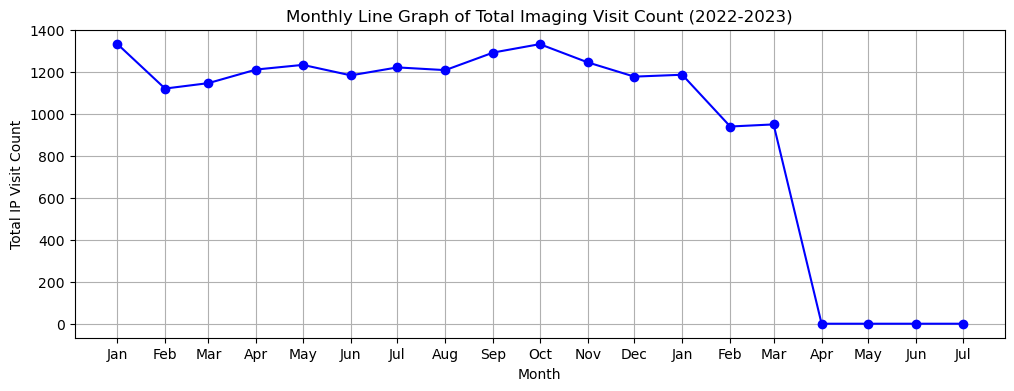

In [10]:
# set of unique month-year which conains data
available_month_years = set((year, month) for year, month in data_monthly.index)

# rep. 1day of month for each year and check if m&y is available in a_m_y
filtered_months = [datetime.datetime(year, month, 1) for year in [2022, 2023] for month in range(1, 13) if (year, month) in available_month_years]

plt.figure(figsize=(12, 4))
x_values = filtered_months
x_ticks_labels = [calendar.month_abbr[month.month] for month in x_values]

#this loop iterates f_m and fetch v_c for y&m indices if inices found append else error 0
IMAGING_VISIT_COUNT_list = []
for month in filtered_months:
    year, month_num = month.year, month.month
    try:
        IMAGING_VISIT_COUNT = data_monthly.loc[(year, month_num)]
        IMAGING_VISIT_COUNT_list.append(IMAGING_VISIT_COUNT)
    except KeyError:
        ip_visit_counts_list.append(0)

plt.plot(x_values, IMAGING_VISIT_COUNT_list, marker='o', linestyle='-', color='b')

plt.xticks(x_values, x_ticks_labels)
plt.xlabel('Month')
plt.ylabel('Total IP Visit Count')
plt.title('Monthly Line Graph of Total Imaging Visit Count (2022-2023)')
plt.grid(True)
plt.show()


# Yearly data on monthly basis

C:\Users\i_manik.kaura\AppData\Local\Temp\ipykernel_26112\446749079.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_data = year_data.resample('M').sum()
C:\Users\i_manik.kaura\AppData\Local\Temp\ipykernel_26112\446749079.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_data = year_data.resample('M').sum()
C:\Users\i_manik.kaura\AppData\Local\Temp\ipykernel_26112\446749079.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

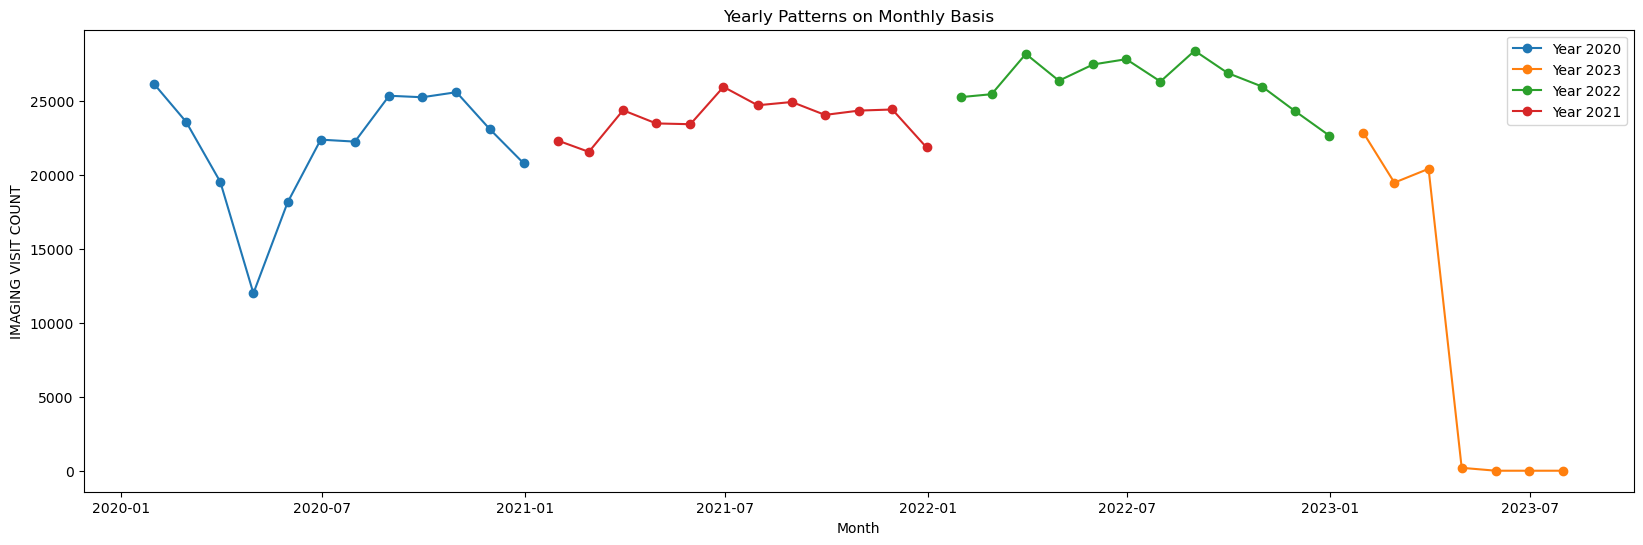

In [11]:
data['MONTH_OF_DATE'] = pd.to_datetime(data['MONTH_OF_DATE'])
data['Year'] = data['MONTH_OF_DATE'].dt.year
data['Month'] = data['MONTH_OF_DATE'].dt.month

# unique years from dataframe
total_years = data['Year'].unique()

plt.figure(figsize=(20, 6))

for year in total_years:
    year_data = data[data['Year'] == year]
    year_data = year_data.sort_values(by='MONTH_OF_DATE') #for ploting the graphs in chronological order
    year_data.set_index('MONTH_OF_DATE', inplace=True)
    year_data = year_data.resample('M').sum()

    plt.plot(year_data.index, year_data['IMAGING_VISIT_COUNT'], marker='o', label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('IMAGING VISIT COUNT')
plt.title('Yearly Patterns on Monthly Basis')
plt.legend()
plt.show()


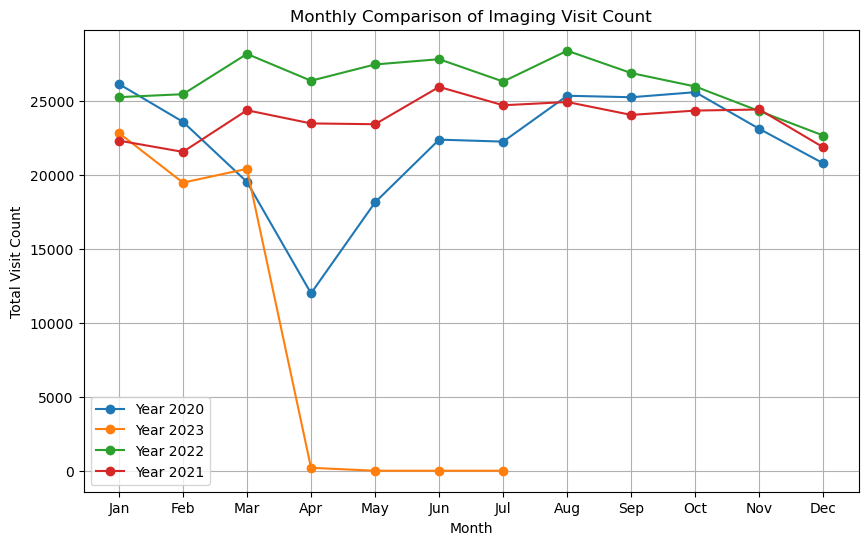

In [12]:
data['MONTH_OF_DATE'] = pd.to_datetime(data['MONTH_OF_DATE'])
data['YEAR'] = data['MONTH_OF_DATE'].dt.year
data['MONTH'] = data['MONTH_OF_DATE'].dt.month
# Filter data for each year
yearly_data = {}
for year in data['YEAR'].unique():
    yearly_data[year] = data[data['YEAR'] == year]
plt.figure(figsize=(10, 6))
for year, year_data in yearly_data.items():
    monthly_data = year_data.groupby('MONTH')['IMAGING_VISIT_COUNT'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o',label=f'Year {year}')
plt.xlabel('Month')
plt.ylabel('Total Visit Count')
plt.title('Monthly Comparison of Imaging Visit Count')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# DATA STATIONARITY


In [13]:
data = data[['IMAGING_VISIT_COUNT','MONTH_OF_DATE']]
data_monthly=data[~data["IMAGING_VISIT_COUNT"].isnull()]

In [14]:
from statsmodels.tsa.stattools import adfuller
data['MONTH_OF_DATE'] = pd.to_datetime(data['MONTH_OF_DATE'])

data = data[data['MONTH_OF_DATE'].dt.year!=2023]

data.set_index('MONTH_OF_DATE' , inplace= True)
data_monthly = data.resample('M').sum()
data_monthly

,IMAGING_VISIT_COUNT
MONTH_OF_DATE,
2020-01-31,26170.0
2020-02-29,23610.0
2020-03-31,19543.0
2020-04-30,12006.0
2020-05-31,18159.0
2020-06-30,22404.0
2020-07-31,22270.0
2020-08-31,25374.0
2020-09-30,25273.0


In [15]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
series = data_monthly["IMAGING_VISIT_COUNT"]
result = adfuller(series)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('The p-value is less than or equal to 0.05. The data is likely stationary.')
else:
    print('The p-value is greater than 0.05. The data is likely non-stationary.')


ADF Statistic: -1.3698133847089449
p-value: 0.5966593850660908
Critical Values: {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}
The p-value is greater than 0.05. The data is likely non-stationary.


In [16]:
series = data_monthly["IMAGING_VISIT_COUNT"]
differenced_series = series.diff().dropna()


In [17]:
from statsmodels.tsa.stattools import adfuller
series = data_monthly["IMAGING_VISIT_COUNT"]
result = adfuller(differenced_series)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('The p-value is less than or equal to 0.05. The differenced data is likely stationary.')
else:
    print('The p-value is greater than 0.05. The differenced data is likely non-stationary.')


ADF Statistic: -5.821174439772791
p-value: 4.1795644509847556e-07
Critical Values: {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}
The p-value is less than or equal to 0.05. The differenced data is likely stationary.


# plot ACF AND PACF

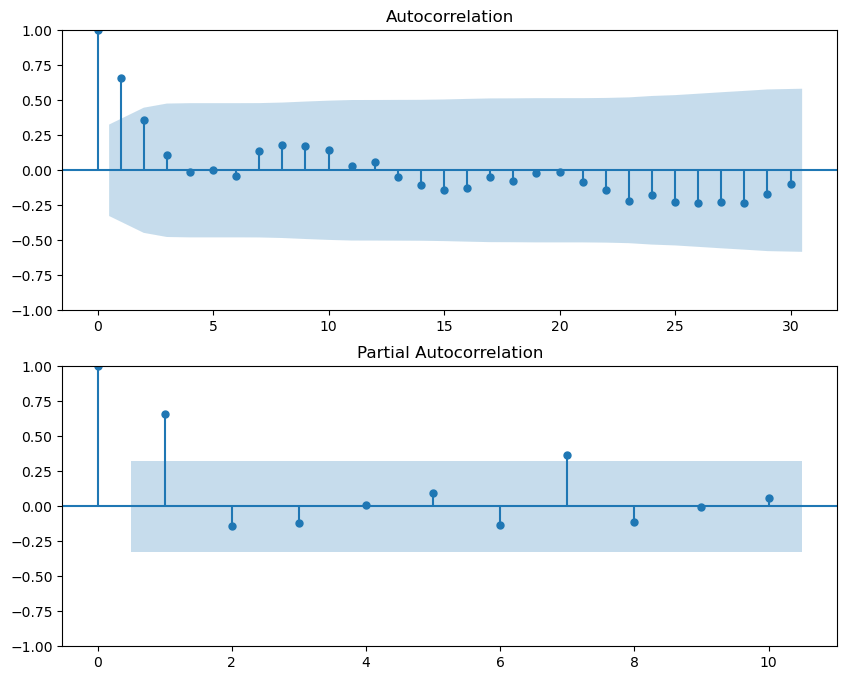

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_monthly['IMAGING_VISIT_COUNT'], lags=30, ax=ax1)
plot_pacf(data_monthly['IMAGING_VISIT_COUNT'], lags=10, ax=ax2)
plt.show()

# Additional Insights (DECOMPOSE-M&Q)


<Figure size 2000x600 with 0 Axes>

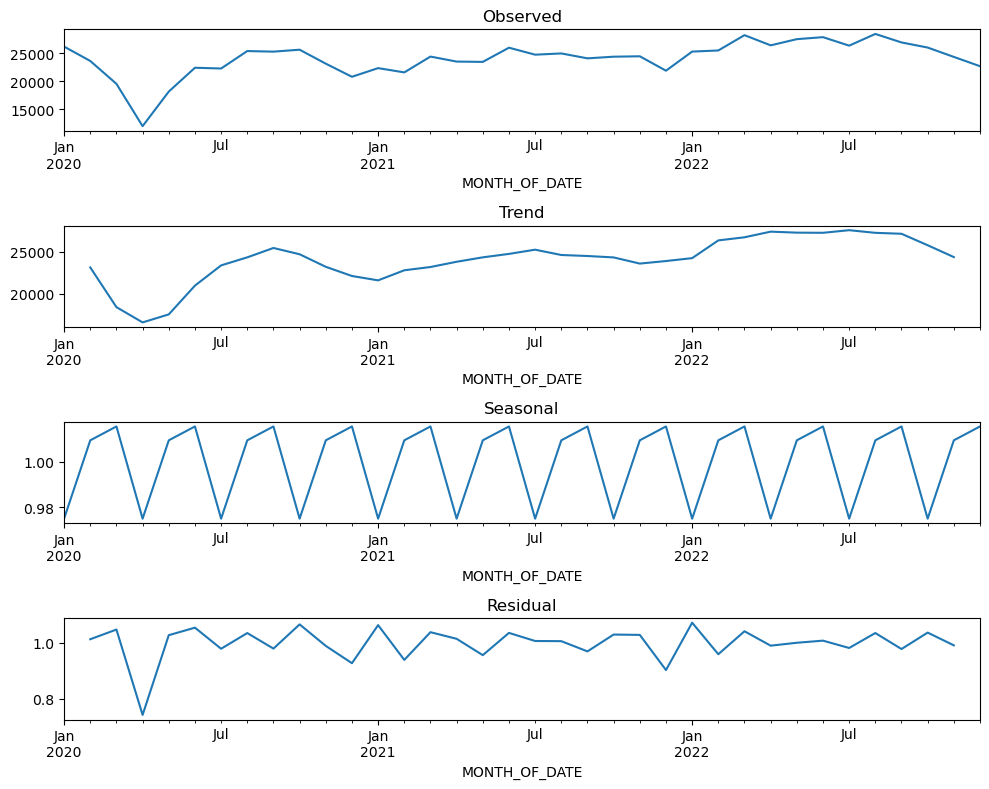

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,6))
result = seasonal_decompose(data_monthly, model='multiplicative',period=3)
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,8))
result.observed.plot(ax=ax1,title="Observed")
result.trend.plot(ax=ax2,title="Trend")
result.seasonal.plot(ax=ax3,title="Seasonal")
result.resid.plot(ax=ax4,title="Residual")
plt.tight_layout()
# result.plot()
plt.show()

In [20]:
data_quater = data.resample('Q').sum()
data_quater

,IMAGING_VISIT_COUNT
MONTH_OF_DATE,
2020-03-31,69323.0
2020-06-30,52569.0
2020-09-30,72917.0
2020-12-31,69541.0
2021-03-31,68307.0
2021-06-30,72922.0
2021-09-30,73758.0
2021-12-31,70694.0
2022-03-31,78964.0


<Figure size 2000x600 with 0 Axes>

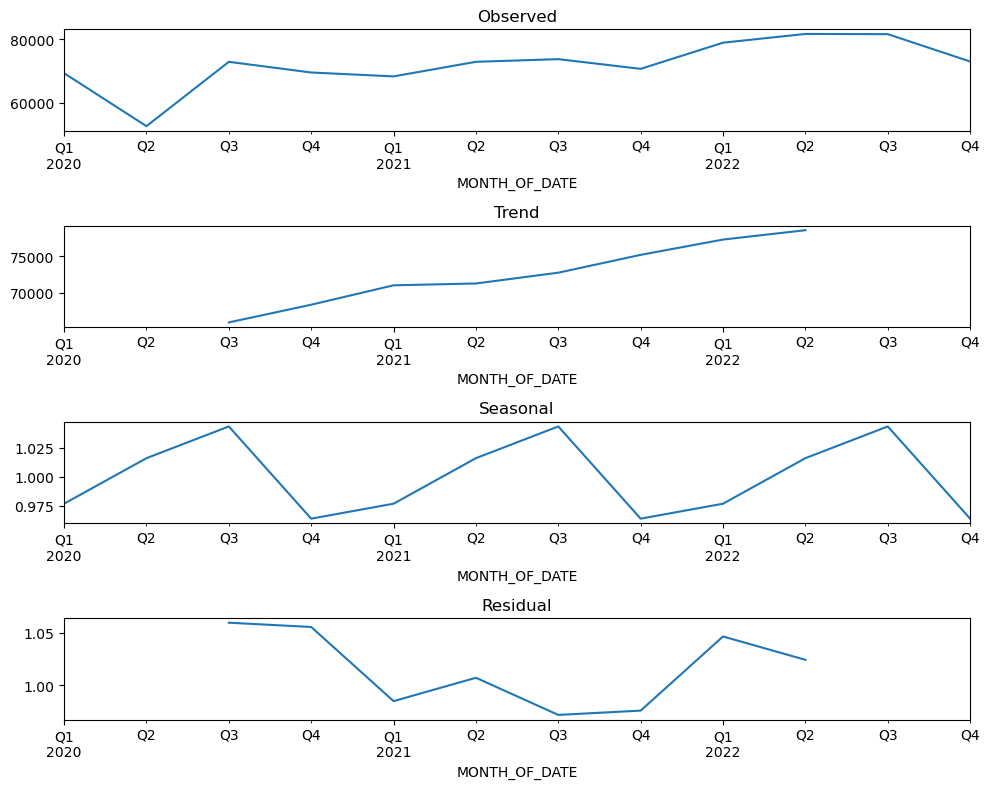

In [21]:
plt.figure(figsize=(20,6))
result = seasonal_decompose(data_quater, model='multiplicative',period=4)
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,8))
result.observed.plot(ax=ax1,title="Observed")
result.trend.plot(ax=ax2,title="Trend")
result.seasonal.plot(ax=ax3,title="Seasonal")
result.resid.plot(ax=ax4,title="Residual")
plt.tight_layout()
# result.plot()
plt.show()

# model training

# ARMA

In [22]:
import pandas as pd
import statsmodels.api as sm

train_ratio = 0.8
train_size = int(len(data_monthly) * train_ratio)

train_data = data_monthly.iloc[:train_size]
validation_data = data_monthly.iloc[train_size:]

print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)


Train data shape: (28, 1)
Validation data shape: (8, 1)


In [150]:
best_mape = float("inf")     #storing the best values of error corresponding parameters
best_params_new = {
    'p' : float("inf"),
    'd' : float("inf"),
    'q' : float("inf")
    }

In [229]:
from hyperopt import fmin, tpe, hp
from sklearn.metrics import mean_absolute_percentage_error
time_index = train_data.index
time_of_year = (time_index - time_index.min()) / pd.Timedelta(days=365)
sine_values = np.sin(2 * np.pi * time_of_year)
cosine_values = np.cos(2 * np.pi * time_of_year)
exog_features = pd.DataFrame({'sine': sine_values, 'cosine': cosine_values}, index=time_index)
y_train = train_data['IMAGING_VISIT_COUNT']

def objective(params):
    p = params['p']
    d = params['d']
    q = params['q']
    order = (p, d, q)
    arma_model = sm.tsa.ARIMA(y_train, order=order, exog=exog_features)
    arma_result = arma_model.fit()
    y_pred = arma_result.predict()
    mape = mean_absolute_percentage_error(y_train, y_pred)
    return mape

space = {
    'p': hp.choice('p', [0, 1, 2]),
    'd': hp.choice('d', [0, 1]),
    'q': hp.choice('q', [0, 1, 2])
}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

best_params = {
    'p': best['p'],
    'd': best['d'],
    'q': best['q']
    }

print("Best parameters:", best_params)

best_order = (best_params['p'], best_params['d'], best_params['q'])
best_arma_model = sm.tsa.ARIMA(y_train, order=best_order, exog=exog_features)
arma_result = best_arma_model.fit()


 60%|██████    | 6/10 [00:01<00:00,  4.16trial/s, best loss: 0.0845291990132967]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters fou

100%|██████████| 10/10 [00:02<00:00,  4.86trial/s, best loss: 0.0845291990132967]
Best parameters: {'p': 2, 'd': 0, 'q': 0}


In [230]:
print(best_params)

{'p': 2, 'd': 0, 'q': 0}


In [234]:
time_index_validation = validation_data.index
time_of_year_validation = (time_index_validation - time_index.min()) / pd.Timedelta(days=365)
sine_values_validation = np.sin(2 * np.pi * time_of_year_validation)
cosine_values_validation = np.cos(2 * np.pi * time_of_year_validation)

exog_features_validation = pd.DataFrame({'sine': sine_values_validation, 'cosine': cosine_values_validation}, index=time_index_validation)
time_index_validation = validation_data.index
y_validation = validation_data['IMAGING_VISIT_COUNT']
arma_predictions = arma_result.predict(start=len(y_train), end=len(y_train) + len(y_validation) - 1, dynamic=False, exog=exog_features_validation)


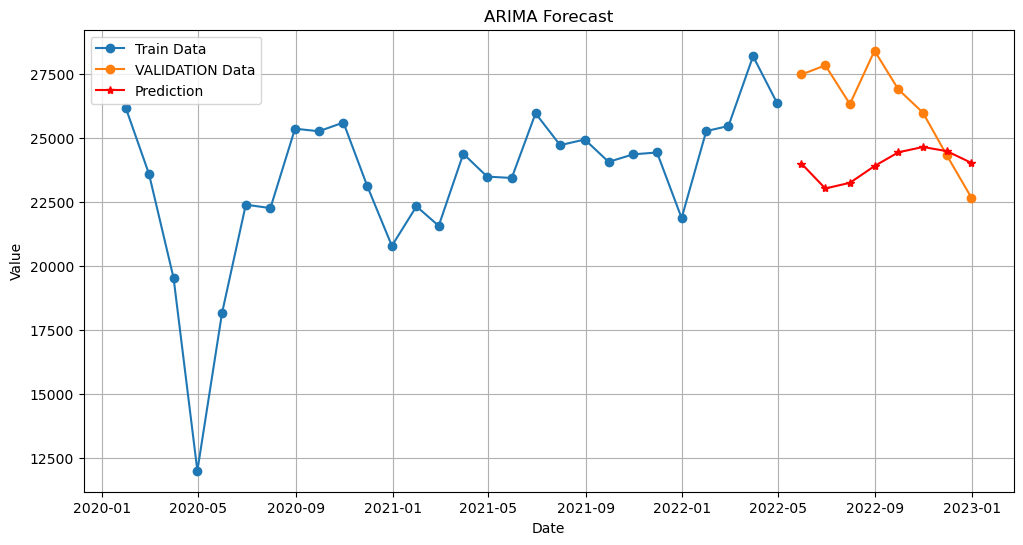

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index,train_data['IMAGING_VISIT_COUNT'], label ="Train Data",marker='o')
plt.plot(validation_data.index,validation_data['IMAGING_VISIT_COUNT'], label ="VALIDATION Data",marker='o')
plt.plot(validation_data.index,arma_predictions,label="Prediction",color="red",marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title("ARIMA Forecast")
plt.show()

In [233]:
# actual_values = validation_data['IMAGING_VISIT_COUNT'].values
# forecasted_values = fitted_model.forecast(steps=len(validation_data))

absolute_percentage_errors = np.abs((y_validation - arma_predictions) / y_validation)

mape = np.mean(absolute_percentage_errors) * 100

if(mape < best_mape):
    best_mape = mape
    best_params_new = best_params

print(best_params)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


{'p': 2, 'd': 0, 'q': 0}
Mean Absolute Percentage Error (MAPE): 9.81%


### best case

In [236]:
best_order = (best_params_new['p'], best_params_new['d'], best_params_new['q'])


In [237]:
best_arma_model = sm.tsa.ARIMA(y_train, order=best_order, exog=exog_features)
arma_result = best_arma_model.fit()

In [238]:
exog_features_validation = pd.DataFrame({'sine': sine_values_validation, 'cosine': cosine_values_validation}, index=time_index_validation)
time_index_validation = validation_data.index
y_validation = validation_data['IMAGING_VISIT_COUNT']
arma_predictions = arma_result.predict(start=len(y_train), end=len(y_train) + len(y_validation) - 1, dynamic=False, exog=exog_features_validation)

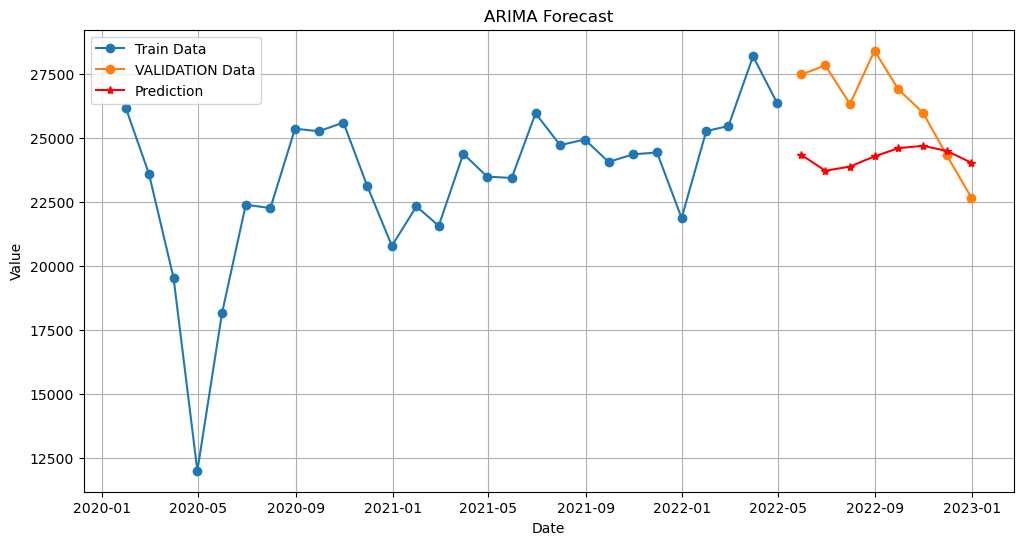

In [239]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index,train_data['IMAGING_VISIT_COUNT'], label ="Train Data",marker='o')
plt.plot(validation_data.index,validation_data['IMAGING_VISIT_COUNT'], label ="VALIDATION Data",marker='o')
plt.plot(validation_data.index,arma_predictions,label="Prediction",color="red",marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title("ARIMA Forecast")
plt.show()

In [240]:
absolute_percentage_errors = np.abs((y_validation - arma_predictions) / y_validation)
mape = np.mean(absolute_percentage_errors) * 100

if mape < best_mape:
    best_mape = mape
    best_params_new = best_params

print(best_params_new)
print(f"Mean Absolute Percentage Error (MAPE): {best_mape:.2f}%")


{'p': 1, 'd': 0, 'q': 1}
Mean Absolute Percentage Error (MAPE): 8.78%


# HALT WINTER

In [874]:
best_mape = float("inf")     #storing the best values of error corresponding parameters
best_params_new = {
    'alpha' : float("inf"),
    'beta' : float("inf"),
    'gamma' : float("inf"),
    's' : float("inf")
}

In [929]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from hyperopt import fmin, tpe, hp
import numpy as np
import pandas as pd
import random

# Assuming train_data and other necessary data are defined

time_index = train_data.index
time_of_year = (time_index - time_index.min()) / pd.Timedelta(days=365)
sine_values = np.sin(2 * np.pi * time_of_year)
cosine_values = np.cos(2 * np.pi * time_of_year)
exog_features = pd.DataFrame({'sine': sine_values, 'cosine': cosine_values}, index=time_index)
y_train = train_data['IMAGING_VISIT_COUNT']

# Define the ranges for alpha, beta, gamma, and s values
alpha_space = hp.uniform('alpha', 0.01, 0.05)
beta_space = hp.uniform('beta', 0.01, 0.05)
gamma_space = hp.uniform('gamma', 0.01, 0.05)
s_space = hp.choice('s', [9, 10, 11, 12])

def objective(params):
    alpha = params['alpha']
    beta = params['beta']
    gamma = params['gamma']
    s = params['s']
#     print(params)

    model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=s,  
                                 initialization_method="estimated")
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

    sse = np.sum((y_train - fitted_model.fittedvalues)**2)

    return sse


space = {
    'alpha':  hp.uniform('alpha', 0.01, 0.05),
    'beta': hp.uniform('beta', 0.01, 0.05),
    'gamma': hp.uniform('gamma', 0.01, 0.05),
    's': hp.choice('s', [9, 10, 11, 12])
}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1)
s_values = [9,10,11,12]
# Extract the best parameters
best_params = {
    'alpha': best['alpha'],
    'beta': best['beta'],
    'gamma': best['gamma'],
    's': s_values[best['s']]
}

# Print the best parameters
print("Best parameters:", best_params)

# Create and fit the best model using the best parameters
best_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=best_params['s'],  
                                  initialization_method="estimated")
fitted_model = best_model.fit(smoothing_level=best_params['alpha'],
                              smoothing_trend=best_params['beta'],
                              smoothing_seasonal=best_params['gamma'])

100%|██████████| 1/1 [00:00<00:00,  8.27trial/s, best loss: 156891670.02912673]
Best parameters: {'alpha': 0.03380244245106904, 'beta': 0.018198441200889877, 'gamma': 0.02704778578868769, 's': 11}


In [930]:
forecast_values = fitted_model.forecast(steps=len(y_validation))

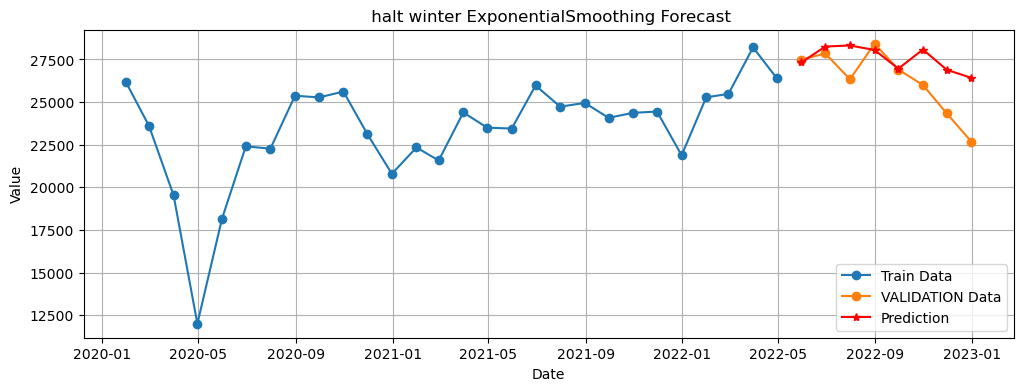

In [931]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index,train_data['IMAGING_VISIT_COUNT'], label ="Train Data",marker='o')
plt.plot(validation_data.index,validation_data['IMAGING_VISIT_COUNT'], label ="VALIDATION Data",marker='o')
plt.plot(validation_data.index,forecast_values,label="Prediction",color="red",marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title(" halt winter ExponentialSmoothing Forecast")
plt.show()

In [932]:
actual_values = validation_data['IMAGING_VISIT_COUNT'].values
forecasted_values = fitted_model.forecast(steps=len(validation_data))

absolute_percentage_errors = np.abs((actual_values - forecasted_values) / actual_values)

mape = np.mean(absolute_percentage_errors) * 100

if(mape < best_mape):
    best_mape = mape
    best_params_new = best_params

print(best_params)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



{'alpha': 0.03380244245106904, 'beta': 0.018198441200889877, 'gamma': 0.02704778578868769, 's': 11}
Mean Absolute Percentage Error (MAPE): 5.76%


### BEST CASE GRAPH

In [904]:
best_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=best_params_new['s'],  
                                  initialization_method="estimated")
fitted_model = best_model.fit(smoothing_level=best_params_new['alpha'],
                              smoothing_trend=best_params_new['beta'],
                              smoothing_seasonal=best_params_new['gamma'])

In [905]:
forecast_values = fitted_model.forecast(steps=len(y_validation))

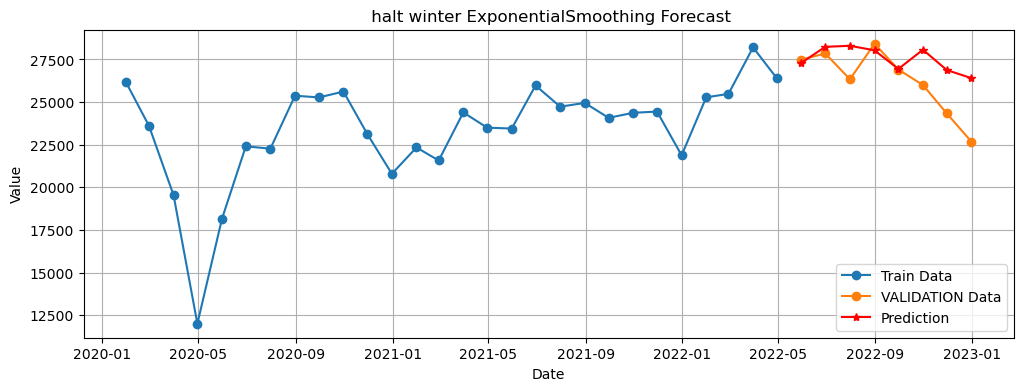

In [906]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index,train_data['IMAGING_VISIT_COUNT'], label ="Train Data",marker='o')
plt.plot(validation_data.index,validation_data['IMAGING_VISIT_COUNT'], label ="VALIDATION Data",marker='o')
plt.plot(validation_data.index,forecast_values,label="Prediction",color="red",marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title(" halt winter ExponentialSmoothing Forecast")
plt.show()

In [907]:
print(best_params_new)
print(f"Mean Absolute Percentage Error (MAPE): {best_mape:.2f}%")


{'alpha': 0.032418183932619755, 'beta': 0.035504748070776276, 'gamma': 0.014708872456652214, 's': 11}
Mean Absolute Percentage Error (MAPE): 5.73%


# SARIMA W RECURSIVE FEATURING

In [1135]:
best_mape_new = float("inf")     #storing the best values of error corresponding parameters
best_params_new = {
    'p' : float("inf"),
    'd' : float("inf"),
    'q' : float("inf"),
    'P' : float("inf"),
    'D' : float("inf"),
    'Q' : float("inf"),
    's' : float("inf")
}

In [1160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from hyperopt import fmin, tpe, hp
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

time_index = train_data.index
time_of_year = (time_index - time_index.min()) / pd.Timedelta(days=365)
sine_values = np.sin(2 * np.pi * time_of_year)
cosine_values = np.cos(2 * np.pi * time_of_year)
exog_features = pd.DataFrame({'sine': sine_values, 'cosine': cosine_values}, index=time_index)
y_train = train_data['IMAGING_VISIT_COUNT']
combined_data = pd.concat([exog_features], axis=1)

def objective(params):
    p = params['p']
    d = params['d']
    q = params['q']
    P = params['P']
    D = params['D']
    Q = params['Q']
    s = params['s']  

    order = (p, d, q)
    seasonal_order = (P, D, Q, s)  

    sarima_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, exog=exog_features)
    sarima_result = sarima_model.fit(method='powell')
    
    y_pred = sarima_result.predict()
    mape = mean_absolute_percentage_error(y_train, y_pred)
    
    return mape

space = {
    'p': hp.choice('p', range(0, 5)),
    'd': hp.choice('d', range(0, 2)),
    'q': hp.choice('q', range(0, 5)),
    'P': hp.choice('P', range(0, 5)),
    'D': hp.choice('D', range(0, 2)),
    'Q': hp.choice('Q', range(0, 5)),
    's': hp.choice('s', range(9, 13))  
}


best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=2)

# Define SARIMA model evaluation function
def sarima_model_evaluation(order, seasonal_order, exog_features):
    sarima_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, exog=exog_features)
    sarima_result = sarima_model.fit(method='powell')
    y_pred = sarima_result.predict()
    mape = mean_absolute_percentage_error(y_train, y_pred)
    return mape

# Define recursive feature selection function
def recursive_feature_selection(candidate_features, order, seasonal_order):
    best_mape = float("inf")
    worst_feature = None
#     print(order)
    for feature in candidate_features:
        features_to_test = [f for f in candidate_features if f != feature]
        mape = sarima_model_evaluation(order, seasonal_order, exog_features[features_to_test])

        if mape < best_mape:
            best_mape = mape
            worst_feature = feature

    return worst_feature, best_mape


best_hyperparameter_indexes = {
    'p': best['p'],
    'd': best['d'],
    'q': best['q'],
    'P': best['P'],
    'D': best['D'],
    'Q': best['Q'],
    's': best['s']  
}

hyperparameter_mapping = {
    'p': list(range(0, 5)),  
    'd': list(range(0, 2)),          
    'q': list(range(0, 5)),  
    'P': list(range(0, 5)),  
    'D': list(range(0, 2)),         
    'Q': list(range(0, 5)),
    's': list(range(9, 13))  
}

best_params_values = {param: hyperparameter_mapping[param][best_hyperparameter_indexes[param]] for param in best_hyperparameter_indexes}

print("Best parameters:", best_params_values)

order_new = (best_params_values['p'],
         best_params_values['d'],
        best_params_values['q'])
seasonal_order_new = (best_params_values['P'],
        best_params_values['D'],
        best_params_values['Q'],
        best_params_values['s'])

candidate_features = ['sine', 'cosine']

# Define the stopping criterion for RFE (e.g., the number of features to keep)
num_features_to_keep = 1
while len(candidate_features) > num_features_to_keep:
    worst_feature, best_mape = recursive_feature_selection(candidate_features, order_new, seasonal_order_new)

    if worst_feature is not None:
        candidate_features.remove(worst_feature)
        print("Removed Feature:", worst_feature)
    else:
        print("No features removed.")

print("Selected Features:", candidate_features)
order_a=(best_params_values['p'], best_params_values['d'], best_params_values['q'])
print(type(order))
seasonal_order=(best_params_values['P'], best_params_values['D'], best_params_values['Q'], best_params_values['s']) 
exog=exog_features[candidate_features]
# Now, you can build the final SARIMA model using the selected features and best_params_values.
final_sarima_model = SARIMAX(y_train, order=order_a,seasonal_order=seasonal_order,exog=exog)
final_sarima_result = final_sarima_model.fit(method='powell')

  0%|          | 0/2 [00:00<?, ?trial/s, best loss=?]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Optimization terminated successfully.                
         Current function value: 8.614158            
         Iterations: 3                               
         Function evaluations: 337                   
 50%|█████     | 1/2 [00:01<00:01,  1.19s/trial, best loss: 0.09790639746412692]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Optimization terminated successfully.                                           
         Current function value: 8.578591                                       
         Iterations: 6                                                          
         Function evaluations: 797                                              
100%|██████████| 2/2 [00:04<00:00,  2.32s/trial, best loss: 0.09184495234766203]
Best parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 4, 'D': 0, 'Q': 0, 's': 11}


C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Optimization terminated successfully.
         Current function value: 8.590822
         Iterations: 4
         Function evaluations: 464


C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Optimization terminated successfully.
         Current function value: 8.650193
         Iterations: 5
         Function evaluations: 586
Removed Feature: sine
Selected Features: ['cosine']
<class 'tuple'>


C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Optimization terminated successfully.
         Current function value: 8.590822
         Iterations: 4
         Function evaluations: 464


In [1161]:
print(candidate_features)
best_feature = candidate_features[0] 

forecast_steps = len(y_validation)
future_time_index = pd.date_range(start=time_index.max(), periods=forecast_steps + 1, freq='M')[1:]

future_time_of_year = (future_time_index - time_index.min()) / pd.Timedelta(days=365)
future_sine_values = np.sin(2 * np.pi * future_time_of_year)
future_cosine_values = np.cos(2 * np.pi * future_time_of_year)

selected_feature_values = {
    best_feature: future_sine_values if best_feature == 'sine' else future_cosine_values
}
exog_features_forecast = pd.DataFrame(selected_feature_values, index=future_time_index)

exog_feature_selected = exog_features_forecast[best_feature].values.reshape(-1, 1)

forecast_values = final_sarima_result.get_forecast(steps=forecast_steps, exog=exog_feature_selected)


['cosine']


In [1162]:
selected_feature_values

{'cosine': Float64Index([-0.49002866642905957,  -0.8565509959010028,  -0.9999629591162655,
                -0.8653072543632067,  -0.5049610547215229, 0.004303538296242443,
                 0.4975132889071806,   0.8695893893466116],
              dtype='float64')}

In [1163]:
exog_features_forecast

,cosine
2022-05-31,-0.490029
2022-06-30,-0.856551
2022-07-31,-0.999963
2022-08-31,-0.865307
2022-09-30,-0.504961
2022-10-31,0.004304
2022-11-30,0.497513
2022-12-31,0.869589


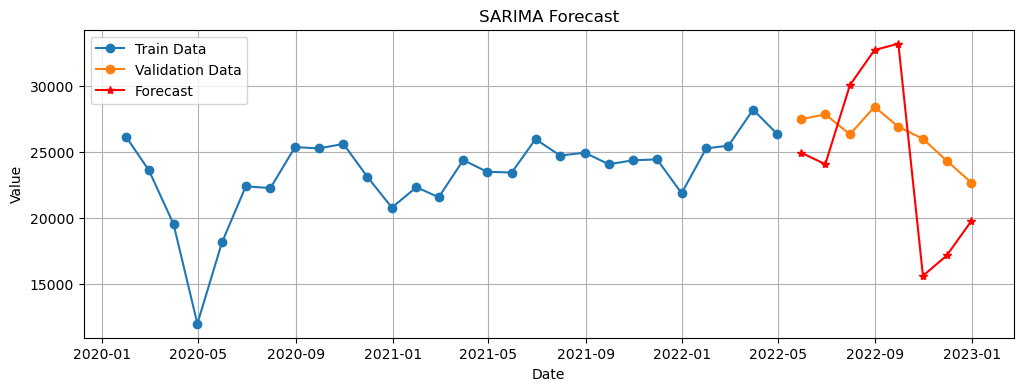

In [1164]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index, train_data['IMAGING_VISIT_COUNT'], label="Train Data", marker='o')
plt.plot(validation_data.index, validation_data.values, label="Validation Data", marker='o')  # Extract values from the Series
plt.plot(validation_data.index, forecast_values.predicted_mean, label="Forecast", color="red", marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title("SARIMA Forecast")
plt.show()

In [1165]:
forecast_series = pd.Series(forecast_values.predicted_mean, index=y_validation.index)
mape = mean_absolute_percentage_error(y_validation, forecast_series)

if mape < best_mape_new:
    best_mape_new = mape
    best_params_new = best_params_values
print("Best parameters:")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")
print(f"p: {best_params_values['p']}, d: {best_params_values['d']}, q: {best_params_values['q']}")
print(f"P: {best_params_values['P']}, D: {best_params_values['D']}, Q: {best_params_values['Q']}, s: {best_params_values['s']}")

Best parameters:
Mean Absolute Percentage Error (MAPE): 19.69%
p: 3, d: 1, q: 2
P: 4, D: 0, Q: 0, s: 11


### BEST CASE

In [1166]:
selected_feature_values = {
    best_feature: future_sine_values if best_feature == 'sine' else future_cosine_values
}
exog_features_forecast = pd.DataFrame(selected_feature_values, index=future_time_index)

exog_feature_selected = exog_features_forecast[best_feature].values.reshape(-1, 1)

forecast_values = final_sarima_result.get_forecast(steps=forecast_steps, exog=exog_feature_selected)

In [1167]:
best_order = (best_params_new['p'], best_params_new['d'], best_params_new['q'])
best_seasonal_order = (best_params_new['P'], best_params_new['D'], best_params_new['Q'], best_params_new['s'])

In [1156]:
best_sarima_model = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order, exog=exog)
sarima_result = best_sarima_model.fit(method='powell')


C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Optimization terminated successfully.
         Current function value: 8.348422
         Iterations: 23
         Function evaluations: 3358


In [1168]:
selected_feature_values = {
    best_feature: future_sine_values if best_feature == 'sine' else future_cosine_values
}
exog_features_forecast = pd.DataFrame(selected_feature_values, index=future_time_index)

exog_feature_selected = exog_features_forecast[best_feature].values.reshape(-1, 1)

forecast_values = sarima_result.get_forecast(steps=forecast_steps, exog=exog_feature_selected)

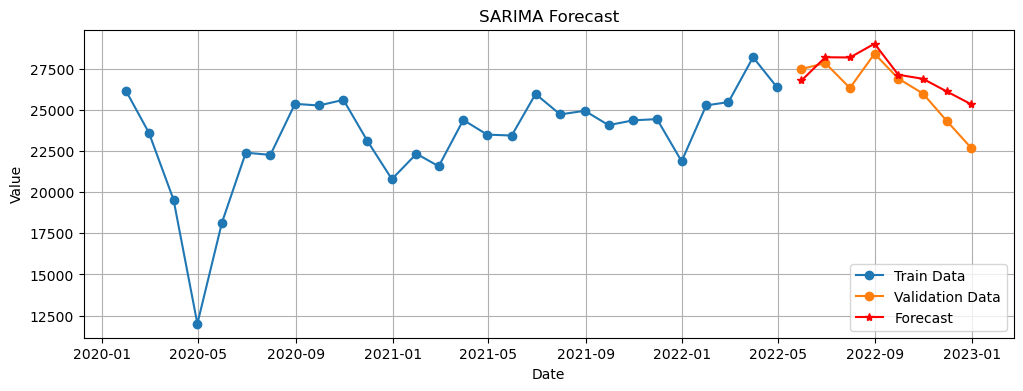

In [1169]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index, train_data['IMAGING_VISIT_COUNT'], label="Train Data", marker='o')
plt.plot(validation_data.index, validation_data.values, label="Validation Data", marker='o')  # Extract values from the Series
plt.plot(validation_data.index,forecast_values.predicted_mean,label="Forecast", color="red", marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)

plt.title("SARIMA Forecast")
plt.show()


In [1170]:
print("Best parameters:")
print(f"Mean Absolute PercentageError (MAPE): {best_mape_new*100:.2f}%")
print(f"p: {best_params_new['p']}, d: {best_params_new['d']}, q: {best_params_new['q']}")
print(f"P: {best_params_new['P']}, D: {best_params_new['D']}, Q: {best_params_new['Q']}, s: {best_params_new['s']}")

Best parameters:
Mean Absolute PercentageError (MAPE): 4.55%
p: 4, d: 1, q: 3
P: 3, D: 0, Q: 2, s: 10


# SARIMA

In [370]:
best_mape = float("inf")     #storing the best values of error corresponding parameters
best_params_new = {
    'p' : float("inf"),
    'd' : float("inf"),
    'q' : float("inf"),
    'P' : float("inf"),
    'D' : float("inf"),
    'Q' : float("inf")
}

In [595]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from hyperopt import fmin, tpe, hp
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Assuming train_data and other necessary data are defined

time_index = train_data.index
time_of_year = (time_index - time_index.min()) / pd.Timedelta(days=365)
sine_values = np.sin(2 * np.pi * time_of_year)
cosine_values = np.cos(2 * np.pi * time_of_year)
exog_features = pd.DataFrame({'sine': sine_values, 'cosine': cosine_values}, index=time_index)
y_train = train_data['IMAGING_VISIT_COUNT']

def feature_selection(features, params):
    p = params['p']
    d = params['d']
    q = params['q']
    P = params['P']
    D = params['D']
    Q = params['Q']
    s = params['s']  

    order = (p, d, q)
    seasonal_order = (P, D, Q, s)
    
    y_train_with_features = y_train.copy()  # Make a copy of y_train

    # Check if 'sine' is in selected_features
    if 'sine' in selected_features:
        y_train_with_features += features['sine']

    # Check if 'cosine' is in selected_features
    if 'cosine' in selected_features:
        y_train_with_features += features['cosine']

    sarima_model = SARIMAX(y_train_with_features, order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit(method='powell')
    
    y_pred = sarima_result.predict()
    mape = mean_absolute_percentage_error(y_train, y_pred)
    
    return mape

candidate_features = ['sine', 'cosine']
selected_features = []

def objective(params):
    p = params['p']
    d = params['d']
    q = params['q']
    P = params['P']
    D = params['D']
    Q = params['Q']
    s = params['s']  

    order = (p, d, q)
    seasonal_order = (P, D, Q, s)
    
    best_mape = float('inf')  
    best_feature = None  

    for feature in candidate_features:
        features_to_test = selected_features + [feature]
        mape = feature_selection(exog_features[features_to_test], params)
        if mape < best_mape:
            best_mape = mape
            best_feature = feature
    if best_feature is not None:
        selected_features.append(best_feature)
        candidate_features.remove(best_feature)
        print("Best Feature:", best_feature)
    else:
        # Handle the case when no features can be added
        selected_features.append(None)
        print("No features selected.")

    return best_mape


space = {
    'p': hp.choice('p', range(0, 5)),
    'd': hp.choice('d', range(0, 2)),
    'q': hp.choice('q', range(0, 5)),
    'P': hp.choice('P', range(0, 5)),
    'D': hp.choice('D', range(0, 2)),
    'Q': hp.choice('Q', range(0, 5)),
    's': hp.choice('s', range(9, 13))  
}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

best_hyperparameter_indexes = {
    'p': best['p'],
    'd': best['d'],
    'q': best['q'],
    'P': best['P'],
    'D': best['D'],
    'Q': best['Q'],
    's': best['s']  
}

hyperparameter_mapping = {
    'p': list(range(0, 5)),  
    'd': list(range(0, 2)),          
    'q': list(range(0, 5)),  
    'P': list(range(0, 5)),  
    'D': list(range(0, 2)),         
    'Q': list(range(0, 5)),
    's': list(range(9, 13))  
}

best_params_values = {param: hyperparameter_mapping[param][best_hyperparameter_indexes[param]] for param in space.keys()}

print("Best parameters:", best_params_values)
best_order = (best_params_values['p'], best_params_values['d'], best_params_values['q'])
best_seasonal_order = (best_params_values['P'], best_params_values['D'], best_params_values['Q'], best_params_values['s'])

selected_features = [feature for feature in selected_features if feature is not None]

# Check if any feature was selected
if selected_features:
    best_sarima_model = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order, exog=exog_features[selected_features])
    sarima_result = best_sarima_model.fit(method='powell')

else:
    print("No features were selected. Handle this case as needed.")
    

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Optimization terminated successfully.                 
         Current function value: 9.310411             
         Iterations: 7                                
         Function evaluations: 731                    
  0%|          | 0/10 [00:02<?, ?trial/s, best loss=?]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Optimization terminated successfully.                 
         Current function value: 9.310411             
         Iterations: 7                                
         Function evaluations: 731                    
Best Feature:                                         
sine                                                  
 10%|█         | 1/10 [00:04<00:44,  4.92s/trial, best loss: 0.12623828908210552]

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Optimization terminated successfully.                                            
         Current function value: 5.498464                                        
         Iterations: 5                                                           
         Function evaluations: 453                                               
Best Feature:                                                                    
cosine                                                                           
No features selected.                                                            
No features selected.                                                            
No features selected.                                                            
No features selected.                                                            
No features selected.                                                            
No features selected.                                                            
No features sele

C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\i_manik.kaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Optimization terminated successfully.
         Current function value: 9.303054
         Iterations: 13
         Function evaluations: 1615


In [596]:
forecast_steps = len(y_validation)
future_time_index = pd.date_range(start=time_index.max(), periods=forecast_steps+1, freq='M')[1:]

future_time_of_year = (future_time_index - time_index.min()) / pd.Timedelta(days=365)
future_sine_values = np.sin(2 * np.pi * future_time_of_year)
future_cosine_values = np.cos(2 * np.pi * future_time_of_year)

selected_feature_values = {
    'sine': future_sine_values,
    'cosine': future_cosine_values
}
exog_features_forecast = pd.DataFrame(selected_feature_values, index=future_time_index)

combined_data_forecast = exog_features_forecast
forecast_values = sarima_result.get_forecast(steps=forecast_steps, exog=combined_data_forecast)


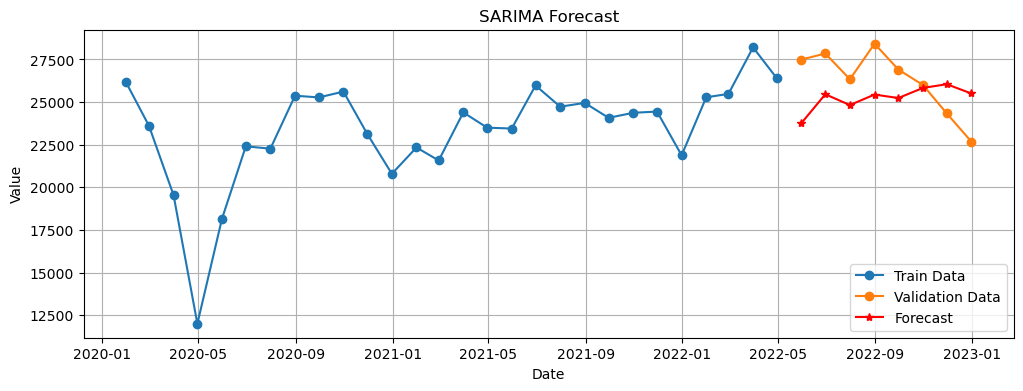

In [597]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index, train_data['IMAGING_VISIT_COUNT'], label="Train Data", marker='o')
plt.plot(validation_data.index, validation_data.values, label="Validation Data", marker='o') 
plt.plot(validation_data.index, forecast_values.predicted_mean, label="Forecast", color="red", marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title("SARIMA Forecast")
plt.show()


In [598]:
actual_values = y_validation
forecasted_values = forecast_values.predicted_mean
absolute_percentage_errors = np.abs((actual_values - forecasted_values) / actual_values)

mape = np.mean(absolute_percentage_errors) * 100

if(mape < best_mape):
    best_mape = mape
    best_params_new = best_params

print(best_params)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


{'alpha': 0.011296717696232167, 'beta': 0.47335895426349317, 'gamma': 0.3675559234159664, 's': 10}
Mean Absolute Percentage Error (MAPE): 8.09%


### best case

In [512]:
best_order = (best_params_values['p'], best_params_values['d'], best_params_values['q'])
best_seasonal_order = (best_params_values['P'], best_params_values['D'], best_params_values['Q'], best_params_values['s'])

In [513]:
best_sarima_model = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order, exog=exog_features)
sarima_result = best_sarima_model.fit(method='powell')

Optimization terminated successfully.
         Current function value: 8.821645
         Iterations: 7
         Function evaluations: 575


In [514]:
forecast_steps = len(y_validation)
future_time_index = pd.date_range(start=time_index.max(), periods=forecast_steps+1, freq='M')[1:]

future_time_of_year = (future_time_index - time_index.min()) / pd.Timedelta(days=365)
future_sine_values = np.sin(2 * np.pi * future_time_of_year)
future_cosine_values = np.cos(2 * np.pi * future_time_of_year)
exog_features_forecast = pd.DataFrame({'sine': future_sine_values, 'cosine': future_cosine_values}, index=future_time_index)

combined_data_forecast = pd.concat([exog_features_forecast], axis=1)
forecast_values = sarima_result.get_forecast(steps=forecast_steps, exog=combined_data_forecast)

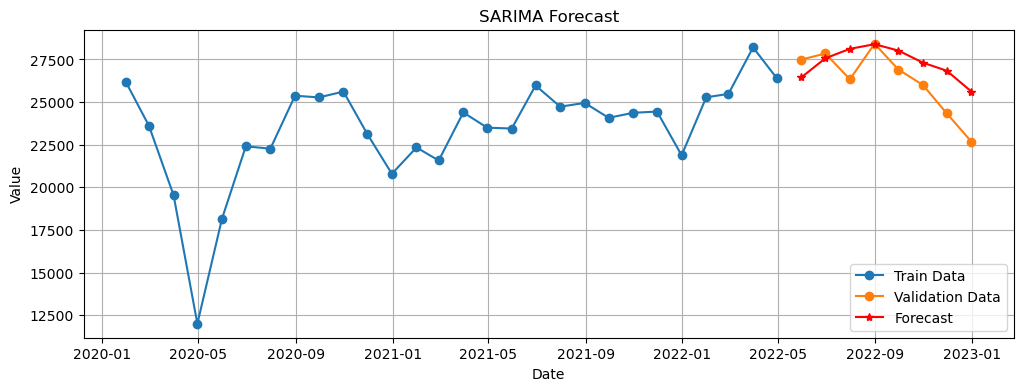

In [515]:
plt.figure(figsize=(12, 4))
plt.plot(train_data.index, train_data['IMAGING_VISIT_COUNT'], label="Train Data", marker='o')
plt.plot(validation_data.index, validation_data.values, label="Validation Data", marker='o')  # Extract values from the Series
plt.plot(validation_data.index, forecast_values.predicted_mean, label="Forecast", color="red", marker='*')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.title("SARIMA Forecast")
plt.show()